In [51]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import jieba
import jieba.analyse
import pandas as pd
import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import imageio

In [52]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://www.ptt.cc/bbs/Gossiping/index39524.html")
browser.find_element_by_name('yes').click()

time.sleep(1)
browser.find_element_by_xpath("//a[contains(@href,'/bbs/Gossiping/index39523.html')]").click(); #往前一頁

html_source = browser.page_source

browser.quit()

soup = BeautifulSoup(html_source, 'html.parser')

In [53]:
words=[]

for d in soup.find_all(class_="r-ent"):
    print(d.text.replace('\t', '').replace('\n', ''))
    print('作者: ' + d.find(class_='author').text,'標題: ' + d.find(class_='title').text,'日期: ' + d.find(class_='date').text)
    words.append(d.find(class_='title').text.replace('\t', '').replace('\n', '').replace('[','').replace(']',''))

17[新聞]倫敦首起病例 華裔妙齡女 沒戴口罩搭Uberakway⋯搜尋同標題文章搜尋看板內 akway 的文章 2/14
作者: akway 標題: 
[新聞]倫敦首起病例 華裔妙齡女 沒戴口罩搭Uber
 日期:  2/14
11[問卦] 遊戲點數跟保險套一起買都是哪種人？！timeforbed⋯搜尋同標題文章搜尋看板內 timeforbed 的文章 2/14
作者: timeforbed 標題: 
[問卦] 遊戲點數跟保險套一起買都是哪種人？！
 日期:  2/14
6[問卦] 慟！電腦藍屏是怎樣？！panda503464⋯搜尋同標題文章搜尋看板內 panda503464 的文章 2/14
作者: panda503464 標題: 
[問卦] 慟！電腦藍屏是怎樣？！
 日期:  2/14
爆[新聞] 快訊／沖繩計程車女司機確診！鑽石公主nba887215⋯搜尋同標題文章搜尋看板內 nba887215 的文章 2/14
作者: nba887215 標題: 
[新聞] 快訊／沖繩計程車女司機確診！鑽石公主
 日期:  2/14
42[新聞] 美參院通過決議 不准川普任意向伊朗宣戰relax911⋯搜尋同標題文章搜尋看板內 relax911 的文章 2/14
作者: relax911 標題: 
[新聞] 美參院通過決議 不准川普任意向伊朗宣戰
 日期:  2/14
23[新聞] 武漢肺炎》中國宣稱「輸入康復者血漿」可LIN9⋯搜尋同標題文章搜尋看板內 LIN9 的文章 2/14
作者: LIN9 標題: 
[新聞] 武漢肺炎》中國宣稱「輸入康復者血漿」可
 日期:  2/14
Re: [問卦] 去中國玩是怎麼樣的體驗？klm⋯搜尋同標題文章搜尋看板內 klm 的文章 2/14
作者: klm 標題: 
Re: [問卦] 去中國玩是怎麼樣的體驗？
 日期:  2/14
5[問卦] 機車停等區到底幹嘛用的？cokecolatw⋯搜尋同標題文章搜尋看板內 cokecolatw 的文章 2/14
作者: cokecolatw 標題: 
[問卦] 機車停等區到底幹嘛用的？
 日期:  2/14
4[問卦] 同一根手指挖兩邊鼻孔，會交叉感染嗎?googled⋯搜尋同標題文章搜尋看板內 googled 的文章 2/14
作者: googled 標題: 
[問卦] 同一根手指挖兩邊鼻

In [54]:
word=','.join(words)
print(word)

新聞倫敦首起病例 華裔妙齡女 沒戴口罩搭Uber,問卦 遊戲點數跟保險套一起買都是哪種人？！,問卦 慟！電腦藍屏是怎樣？！,新聞 快訊／沖繩計程車女司機確診！鑽石公主,新聞 美參院通過決議 不准川普任意向伊朗宣戰,新聞 武漢肺炎》中國宣稱「輸入康復者血漿」可,Re: 問卦 去中國玩是怎麼樣的體驗？,問卦 機車停等區到底幹嘛用的？,問卦 同一根手指挖兩邊鼻孔，會交叉感染嗎?,問卦 台灣的風俗店有統一稱呼嗎,Re: 問卦 現在是不是收復巴丹群島的最好時機？,［問卦］有沒有成語克漏字要怎麼做的八卦,問卦 全球禁飛很難嗎？,問卦 GOOGLE搜尋「尖銳」的恐怖圖片怎麼還在？,問卦 2020東京奧運會不會停止？,Re: 問卦 有沒有B社正製作異塵餘生武漢版的八卦？,問卦 男友在當兵女孩兒情人節在幹嘛,問卦 有沒有全婆五星俠在想什麼的八卦？,Re: 新聞 侮辱公署案首開庭 楊蕙如：發文是要對抗,問卦 今天去吃壽司女友一直瘋狂喂我怎麼辦？


In [55]:
jieba.analyse.set_stop_words('stopword.txt')

sword = jieba.lcut('新聞倫敦首起病例 華裔妙齡女 沒戴口罩搭Uber,問卦 遊戲點數跟保險套一起買都是哪種人？！,問卦 慟！電腦藍屏是怎樣？！,新聞 快訊／沖繩計程車女司機確診！鑽石公主,新聞 美參院通過決議 不准川普任意向伊朗宣戰,新聞 武漢肺炎》中國宣稱「輸入康復者血漿」可,Re: 問卦 去中國玩是怎麼樣的體驗？,問卦 機車停等區到底幹嘛用的？,問卦 同一根手指挖兩邊鼻孔，會交叉感染嗎?,問卦 台灣的風俗店有統一稱呼嗎,Re: 問卦 現在是不是收復巴丹群島的最好時機？,［問卦］有沒有成語克漏字要怎麼做的八卦,問卦 全球禁飛很難嗎？,問卦 GOOGLE搜尋「尖銳」的恐怖圖片怎麼還在？,問卦 2020東京奧運會不會停止？,Re: 問卦 有沒有B社正製作異塵餘生武漢版的八卦？,問卦 男友在當兵女孩兒情人節在幹嘛,問卦 有沒有全婆五星俠在想什麼的八卦？,Re: 新聞 侮辱公署案首開庭 楊蕙如：發文是要對抗,問卦 今天去吃壽司女友一直瘋狂喂我怎麼辦？')
for word in sword:
    print(word)

新聞倫敦
首起
病例
 
華裔
妙齡
女
 
沒戴
口罩
搭
Uber
,
問卦
 
遊戲
點數
跟
保險套
一起
買
都
是
哪種
人
？
！
,
問卦
 
慟
！
電腦
藍屏
是
怎樣
？
！
,
新聞
 
快訊
／
沖
繩計
程車
女司
機確診
！
鑽石
公主
,
新聞
 
美參院
通過
決議
 
不准
川普
任意
向
伊朗
宣戰
,
新聞
 
武漢
肺炎
》
中國
宣稱
「
輸入康
復
者
血漿
」
可
,
Re
:
 
問卦
 
去
中國
玩
是
怎麼樣
的
體驗
？
,
問卦
 
機車
停等區
到底
幹嘛
用
的
？
,
問卦
 
同
一根
手指
挖
兩邊
鼻孔
，
會
交叉感染
嗎
?
,
問卦
 
台灣
的
風俗店
有統
一稱
呼
嗎
,
Re
:
 
問卦
 
現在
是不是
收
復
巴丹
群島
的
最好
時機
？
,
［
問卦
］
有
沒
有成
語克
漏字
要
怎麼
做
的
八卦
,
問卦
 
全球
禁飛
很
難
嗎
？
,
問卦
 
GOOGLE
搜尋
「
尖銳
」
的
恐怖
圖片
怎麼
還在
？
,
問卦
 
2020
東京
奧運會
不會
停止
？
,
Re
:
 
問卦
 
有
沒
有
B
社
正
製
作
異
塵
餘
生
武
漢
版
的
八卦
？
,
問卦
 
男友
在
當兵
女孩
兒
情人
節在
幹
嘛
,
問卦
 
有
沒
有
全婆
五星
俠
在
想
什麼
的
八卦
？
,
Re
:
 
新聞
 
侮辱
公署
案首
開庭
 
楊蕙
如
：
發文
是
要
對
抗
,
問卦
 
今天
去
吃
壽司
女友
一直
瘋狂
喂
我
怎麼
辦
？


In [56]:
word=['新聞倫敦首起病例 華裔妙齡女 沒戴口罩搭Uber,問卦 遊戲點數跟保險套一起買都是哪種人？！,問卦 慟！電腦藍屏是怎樣？！,新聞 快訊／沖繩計程車女司機確診！鑽石公主,新聞 美參院通過決議 不准川普任意向伊朗宣戰,新聞 武漢肺炎》中國宣稱「輸入康復者血漿」可,Re: 問卦 去中國玩是怎麼樣的體驗？,問卦 機車停等區到底幹嘛用的？,問卦 同一根手指挖兩邊鼻孔，會交叉感染嗎?,問卦 台灣的風俗店有統一稱呼嗎,Re: 問卦 現在是不是收復巴丹群島的最好時機？,［問卦］有沒有成語克漏字要怎麼做的八卦,問卦 全球禁飛很難嗎？,問卦 GOOGLE搜尋「尖銳」的恐怖圖片怎麼還在？,問卦 2020東京奧運會不會停止？,Re: 問卦 有沒有B社正製作異塵餘生武漢版的八卦？,問卦 男友在當兵女孩兒情人節在幹嘛,問卦 有沒有全婆五星俠在想什麼的八卦？,Re: 新聞 侮辱公署案首開庭 楊蕙如：發文是要對抗,問卦 今天去吃壽司女友一直瘋狂喂我怎麼辦？']
vectorizer = CountVectorizer() 
X = vectorizer.fit_transform(word)  
word1 = vectorizer.get_feature_names()  
print(word1)  
print(X.toarray())

['2020東京奧運會不會停止', 'google搜尋', 're', '不准川普任意向伊朗宣戰', '中國宣稱', '今天去吃壽司女友一直瘋狂喂我怎麼辦', '侮辱公署案首開庭', '全球禁飛很難嗎', '去中國玩是怎麼樣的體驗', '台灣的風俗店有統一稱呼嗎', '同一根手指挖兩邊鼻孔', '問卦', '尖銳', '快訊', '新聞', '新聞倫敦首起病例', '會交叉感染嗎', '有沒有b社正製作異塵餘生武漢版的八卦', '有沒有全婆五星俠在想什麼的八卦', '有沒有成語克漏字要怎麼做的八卦', '楊蕙如', '機車停等區到底幹嘛用的', '武漢肺炎', '沒戴口罩搭uber', '沖繩計程車女司機確診', '現在是不是收復巴丹群島的最好時機', '男友在當兵女孩兒情人節在幹嘛', '發文是要對抗', '的恐怖圖片怎麼還在', '美參院通過決議', '華裔妙齡女', '輸入康復者血漿', '遊戲點數跟保險套一起買都是哪種人', '鑽石公主', '電腦藍屏是怎樣']
[[ 1  1  4  1  1  1  1  1  1  1  1 15  1  1  4  1  1  1  1  1  1  1  1  1
   1  1  1  1  1  1  1  1  1  1  1]]


In [41]:
if __name__ == "__main__":
    word=['新聞倫敦首起病例 華裔妙齡女 沒戴口罩搭Uber',
          '問卦 遊戲點數跟保險套一起買都是哪種人？！',
          '問卦 慟！電腦藍屏是怎樣？！',
          '新聞 快訊／沖繩計程車女司機確診！鑽石公主',
          '新聞 美參院通過決議 不准川普任意向伊朗宣戰',
          '新聞 武漢肺炎》中國宣稱「輸入康復者血漿」可',
          'Re: 問卦 去中國玩是怎麼樣的體驗？',
          '問卦 機車停等區到底幹嘛用的？',
          '問卦 同一根手指挖兩邊鼻孔，會交叉感染嗎?',
          '問卦 台灣的風俗店有統一稱呼嗎',
          'Re: 問卦 現在是不是收復巴丹群島的最好時機？',
          '問卦有沒有成語克漏字要怎麼做的八卦,問卦 全球禁飛很難嗎？',
          '問卦 GOOGLE搜尋「尖銳」的恐怖圖片怎麼還在？',
          '問卦 2020東京奧運會不會停止？',
          'Re: 問卦 有沒有B社正製作異塵餘生武漢版的八卦？',
          '問卦 男友在當兵女孩兒情人節在幹嘛',
          '問卦 有沒有全婆五星俠在想什麼的八卦？',
          'Re: 新聞 侮辱公署案首開庭 楊蕙如：發文是要對抗',
          '問卦 今天去吃壽司女友一直瘋狂喂我怎麼辦？']
    vectorizer=CountVectorizer()#该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
    transformer=TfidfTransformer()#该类会统计每个词语的tf-idf权值
    tfidf=transformer.fit_transform(vectorizer.fit_transform(word))#第一个fit_transform是计算tf-idf，第二个fit_transform是将文本转为词频矩阵
    word1=vectorizer.get_feature_names()#获取词袋模型中的所有词语
    weight=tfidf.toarray()#将tf-idf矩阵抽取出来，元素a[i][j]表示j词在i类文本中的tf-idf权重
    for i in range(len(weight)):#打印每类文本的tf-idf词语权重，第一个for遍历所有文本，第二个for便利某一类文本下的词语权重
        print(u"-------這裡輸出第",i,u"類文本的詞語tf-idf權重------")
        for j in range(len(word)):
            print(word1[j],weight[i][j])

-------這裡輸出第 0 類文本的詞語tf-idf權重------
2020東京奧運會不會停止 0.0
google搜尋 0.0
re 0.0
不准川普任意向伊朗宣戰 0.0
中國宣稱 0.0
今天去吃壽司女友一直瘋狂喂我怎麼辦 0.0
侮辱公署案首開庭 0.0
全球禁飛很難嗎 0.0
去中國玩是怎麼樣的體驗 0.0
台灣的風俗店有統一稱呼嗎 0.0
同一根手指挖兩邊鼻孔 0.0
問卦 0.0
問卦有沒有成語克漏字要怎麼做的八卦 0.0
尖銳 0.0
快訊 0.0
新聞 0.0
新聞倫敦首起病例 0.5773502691896257
會交叉感染嗎 0.0
有沒有b社正製作異塵餘生武漢版的八卦 0.0
-------這裡輸出第 1 類文本的詞語tf-idf權重------
2020東京奧運會不會停止 0.0
google搜尋 0.0
re 0.0
不准川普任意向伊朗宣戰 0.0
中國宣稱 0.0
今天去吃壽司女友一直瘋狂喂我怎麼辦 0.0
侮辱公署案首開庭 0.0
全球禁飛很難嗎 0.0
去中國玩是怎麼樣的體驗 0.0
台灣的風俗店有統一稱呼嗎 0.0
同一根手指挖兩邊鼻孔 0.0
問卦 0.3632654215693955
問卦有沒有成語克漏字要怎麼做的八卦 0.0
尖銳 0.0
快訊 0.0
新聞 0.0
新聞倫敦首起病例 0.0
會交叉感染嗎 0.0
有沒有b社正製作異塵餘生武漢版的八卦 0.0
-------這裡輸出第 2 類文本的詞語tf-idf權重------
2020東京奧運會不會停止 0.0
google搜尋 0.0
re 0.0
不准川普任意向伊朗宣戰 0.0
中國宣稱 0.0
今天去吃壽司女友一直瘋狂喂我怎麼辦 0.0
侮辱公署案首開庭 0.0
全球禁飛很難嗎 0.0
去中國玩是怎麼樣的體驗 0.0
台灣的風俗店有統一稱呼嗎 0.0
同一根手指挖兩邊鼻孔 0.0
問卦 0.3632654215693955
問卦有沒有成語克漏字要怎麼做的八卦 0.0
尖銳 0.0
快訊 0.0
新聞 0.0
新聞倫敦首起病例 0.0
會交叉感染嗎 0.0
有沒有b社正製作異塵餘生武漢版的八卦 0.0
-------這裡輸出第 3 類文本的詞語tf-idf權重------
2020東京奧運會不會停止 0.0
google搜尋 0.0
re 0.0
不准川普任意向伊

generator:  <generator object Tokenizer.cut at 0x000002B76E6AB348>
新聞倫敦 首起 病例   華裔 妙齡 女   沒戴 口罩 搭 Uber , 問卦   遊戲 點數 跟 保險套 一起 買 都 是 哪種 人 ？ ！ , 問卦   慟 ！ 電腦 藍屏 是 怎樣 ？ ！ , 新聞   快訊 ／ 沖 繩計 程車 女司 機確診 ！ 鑽石 公主 , 新聞   美參院 通過 決議   不准 川普 任意 向 伊朗 宣戰 , 新聞   武漢 肺炎 》 中國 宣稱 「 輸入康 復 者 血漿 」 可 , Re :   問卦   去 中國 玩 是 怎麼樣 的 體驗 ？ , 問卦   機車 停等區 到底 幹嘛 用 的 ？ , 問卦   同 一根 手指 挖 兩邊 鼻孔 ， 會 交叉感染 嗎 ? , 問卦   台灣 的 風俗店 有統 一稱 呼 嗎 , Re :   問卦   現在 是不是 收 復 巴丹 群島 的 最好 時機 ？ , ［ 問卦 ］ 有 沒 有成 語克 漏字 要 怎麼 做 的 八卦 , 問卦   全球 禁飛 很 難 嗎 ？ , 問卦   GOOGLE 搜尋 「 尖銳 」 的 恐怖 圖片 怎麼 還在 ？ , 問卦   2020 東京 奧運會 不會 停止 ？ , Re :   問卦   有 沒 有 B 社 正 製 作 異 塵 餘 生 武 漢 版 的 八卦 ？ , 問卦   男友 在 當兵 女孩 兒 情人 節在 幹 嘛 , 問卦   有 沒 有 全婆 五星 俠 在 想 什麼 的 八卦 ？ , Re :   新聞   侮辱 公署 案首 開庭   楊蕙 如 ： 發文 是 要 對 抗 , 問卦   今天 去 吃 壽司 女友 一直 瘋狂 喂 我 怎麼 辦 ？ 
list:  ['新聞倫敦', '首起', '病例', ' ', '華裔', '妙齡', '女', ' ', '沒戴', '口罩', '搭', 'Uber', ',', '問卦', ' ', '遊戲', '點數', '跟', '保險套', '一起', '買', '都', '是', '哪種', '人', '？', '！', ',', '問卦', ' ', '慟', '！', '電腦', '藍屏', '是', '怎樣', '？', '！', ',', '新聞', ' ', '快訊

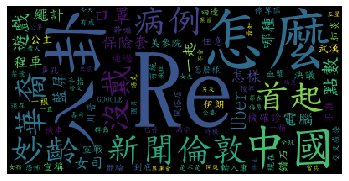

In [69]:
Text ='新聞倫敦首起病例 華裔妙齡女 沒戴口罩搭Uber,問卦 遊戲點數跟保險套一起買都是哪種人？！,問卦 慟！電腦藍屏是怎樣？！,新聞 快訊／沖繩計程車女司機確診！鑽石公主,新聞 美參院通過決議 不准川普任意向伊朗宣戰,新聞 武漢肺炎》中國宣稱「輸入康復者血漿」可,Re: 問卦 去中國玩是怎麼樣的體驗？,問卦 機車停等區到底幹嘛用的？,問卦 同一根手指挖兩邊鼻孔，會交叉感染嗎?,問卦 台灣的風俗店有統一稱呼嗎,Re: 問卦 現在是不是收復巴丹群島的最好時機？,［問卦］有沒有成語克漏字要怎麼做的八卦,問卦 全球禁飛很難嗎？,問卦 GOOGLE搜尋「尖銳」的恐怖圖片怎麼還在？,問卦 2020東京奧運會不會停止？,Re: 問卦 有沒有B社正製作異塵餘生武漢版的八卦？,問卦 男友在當兵女孩兒情人節在幹嘛,問卦 有沒有全婆五星俠在想什麼的八卦？,Re: 新聞 侮辱公署案首開庭 楊蕙如：發文是要對抗,問卦 今天去吃壽司女友一直瘋狂喂我怎麼辦？'
seg_list = jieba.cut(Text, cut_all=False)
print('generator: ',seg_list)
for seg in seg_list:
    print(seg,end=' ')
print('')
seg_list = jieba.lcut(Text, cut_all=False)
print('list: ',seg_list)

def remove_stop_words(file_name,seg_list):
    with open(file_name,'r',encoding="utf-8") as f:
        stop_words = f.readlines()
    
    stop_words = [stop_word.rstrip() for stop_word in stop_words]
    new_list=[]
    
    for seg in seg_list:
        if seg not in stop_words:
            new_list.append(seg) #若在for loop裡用remove的話則會改變總長度
    return new_list

file_name = './stopword.txt'
seg_list = remove_stop_words(file_name,seg_list)
print('remove_stop_words: ',seg_list)

def count_segment_freq(seg_list):
    seg_df = pd.DataFrame(seg_list,columns=['seg'])
    seg_df['count'] = 1
    sef_freq = seg_df.groupby('seg')['count'].sum().sort_values(ascending=False)
    sef_freq = pd.DataFrame(sef_freq)
    return sef_freq

sef_freq = count_segment_freq(seg_list)
sef_freq.head()

font_path = './kaiu.ttf' # 標楷體
seg_list=' '.join(seg_list)

wc = WordCloud(background_color='black',font_path=font_path)
wc.generate(seg_list)
plt.imshow(wc)
plt.axis("off")
plt.show()

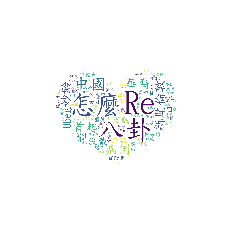

In [70]:
back_color = imageio.imread('./heart.jpg')
wc = WordCloud(
    background_color='white',
    mask=back_color,
    random_state=10,
    font_path=font_path
                )
wc.generate(seg_list)
plt.imshow(wc)
plt.axis('off')
plt.show()